# Plot cutflows

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
from auxPlots import interpolateData, getContours
import seaborn as sns
import numpy as np
import glob
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.3)
cm = plt.colormaps['RdYlBu']

### Load ATLAS Recast Data

In [10]:
files = list(glob.glob('../results_dataFrames/cdfo_*_400.0_tau_*_2016_08_cutflow.pcl'))

recastDataDict = {f : pd.read_pickle(f) for f in files}

### Get Model parameters

In [17]:
msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
labels = {}
for f,recastData in recastDataDict.items():
    modelDict = {msb : recastData.iloc[0][msb], mn1 : recastData.iloc[0][mn1], tau : recastData.iloc[0][tau]}
    label = r'$m_{Y} = %1.0f$ GeV, $m_{\tilde \chi_1^0} = %1.0f$ GeV, $\tau = %1.1e$ ns'%(modelDict['mLLP'],modelDict['mLSP'],modelDict['tau_ns'])
    labels[f] = label
    

### Fix labels

In [18]:
labelsDict = {'$nTracks >= 5$' : '$n_{\\rm trk} \geq 5$',
              '$mDV > 10$ GeV' : '$m_{DV} > 10$ GeV',
              '$MET > 200$ GeV' : '$E_T^{miss} > 200$ GeV',              
              'Triggeremulation' : 'Trigger',
              '$MET > 250$ GeV' : '$E_T^{miss} > 250$ GeV',   
              'Electronveto' : 'Electron Veto',
              'Muonveto' : 'Muon Veto',
              'Tauveto' : 'Tau Veto',
              'Bjetveto' : '$b$-jet Veto',
              'Photonveto' : 'Photon Veto',
              '$\\Delta \\phi (jet,p_{T}^{miss})>0.5$ rad' : '$\\Delta \\phi (jet,E_{T}^{miss})>0.5$ rad',
             'LeadingAK4jet$p_{T}>100$GeV' : '$p_{T}(j_1) > 100$ GeV',
             'LeadingAK4jet$\\eta<2.4$' : '$\\eta(j_1) < 2.4$' ,
             'DisplacedJet veto ($R < 2.0$)' : 'Disp. Jet veto',
             'HCALmitigation(jets)' : 'HCAL cuts (jets)',
             'HCALmitigation($\\phi^{miss}$)' : 'HCAL cuts ($\\phi^{miss}$)',
             '+Evt Eff' : '$\\times$ evt eff.',
             '+DV Eff' : '$\\times$ DV eff.',
             'final Acc*Eff' : '$\\times$ acc. $\\times$ eff.'}

### Plot cutflow for each analyses

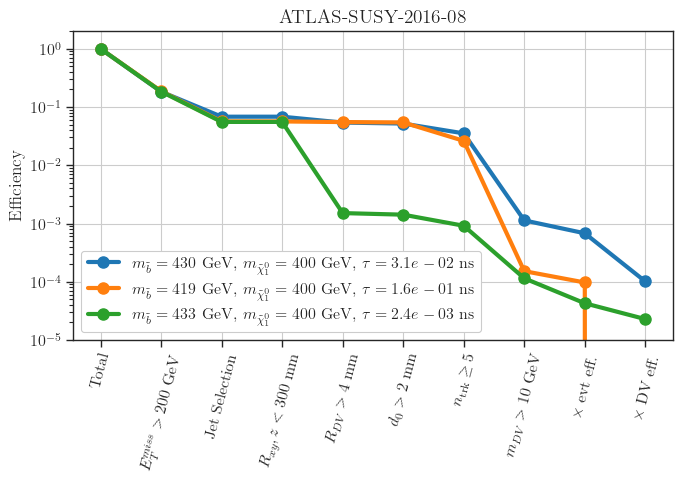

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
for f,recastData in recastDataDict.items():
    recastData = recastData.drop(columns='DisplacedJet veto ($R < -1.0$)',errors='ignore')
    x_ticks = [r'%s'%c for c in recastData.columns]
    x_ticks = x_ticks[x_ticks.index('Total'):]
    x_ticksL = [labelsDict[xl] if xl in labelsDict else xl for xl in x_ticks[:]] 
    x = np.arange(0.,len(x_ticksL),1.)
    ax.set_xticks(x, x_ticksL,rotation=75)
    y = recastData.iloc[0][x_ticks]
    yerr = [v[1] for v in y[:]]
    y = [v[0] for v in y[:]]
    ax.plot(x,y,linewidth=3,marker='o',markersize=8,label=labels[f])
ax.set_yscale('log')
ax.set_ylabel('Efficiency')
ax.set_ylim(1e-5,2.)
ax.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1.])
ax.set_title('ATLAS-SUSY-2016-08',fontsize=14)
ax.legend(framealpha=1.0)    
ax.grid()
plt.tight_layout()
plt.show()